# Bay Wheels 
## Data Explanatory  
## by Jeeva K

## Investigation Overview

 Bay Wheels dataset is analysed, explored the insights about the user behaviour in bike rides.

 The goal of this project is to 

- Have in depth understand of customer and subscriber usage with respect to day, week and month.
- Study the relation between trip duration and distance with user behaviour.

## Dataset Overview

- Bay Wheels bike Data is gathered from https://www.lyft.com/bikes/bay-wheels/system-data. 
- The Dataset is from 2017 to 2020. But the 2019 Data alone used in this project.


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
bike_clean = pd.read_csv(r'C:\\Users\\Jeeva\\Desktop\\Project Template\\baywheels_2019_clean.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Bike usage with respect to day, week and month

> > The Monthly, weekly, daily and ride time usage of the bike in bay wheels. The exploration shows the various usage of ride with day, week, month from the users bike trips.

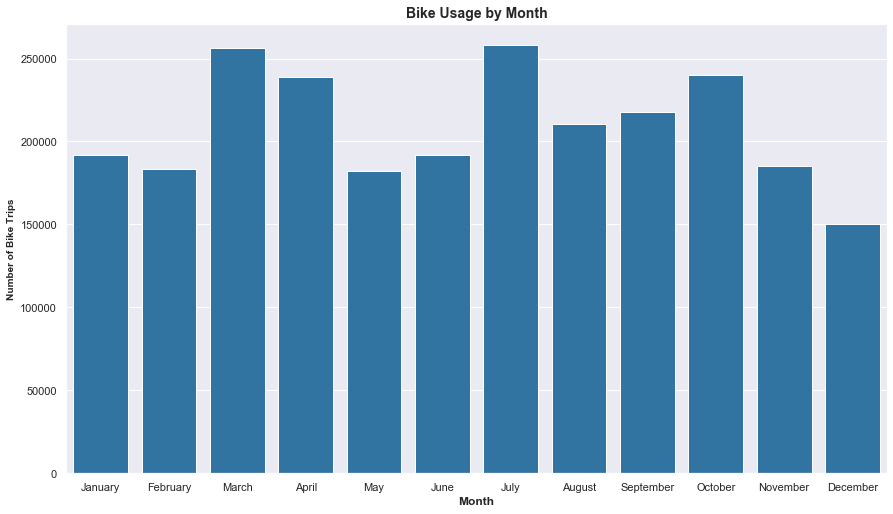

In [4]:
# Monthly usage of the Bay Wheels
base_color = sns.color_palette()[0]
sns.set(style="darkgrid")
plt.figure(figsize=[14.70, 8.27])
ax = sns.countplot(data = bike_clean, x = 'start_time_month', color = base_color)
ax.set_title('Bike Usage by Month', fontdict = {'fontsize':14,  'fontweight':'bold'})
ax.set_xlabel('Month', fontsize = 12, weight = "bold")
ax.set_ylabel('Number of Bike Trips', fontsize = 10, weight = "bold")
#ax.set(xlabel='Month', ylabel='Number of Bike Trips', title='Bay Wheels Usage by Month')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0);

**The monthly usage of the bay wheels bike shows that March, July are the mostly used followed by April and October. The third most highest monthy usage is August and September. The less monthly usage is December month.**

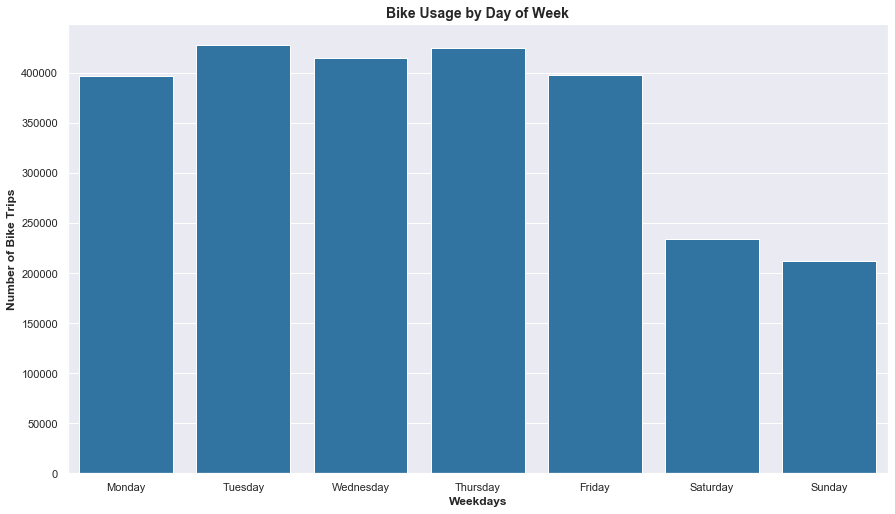

In [5]:
# Weekday usage of the Bay Wheels system
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=[14.70, 8.27])
ax = sns.countplot(data = bike_clean, x = 'start_time_weekday', color = base_color, order = day_order)
ax.set_title('Bike Usage by Day of Week', fontdict = {'fontsize':14,  'fontweight':'bold'})
ax.set_xlabel('Weekdays', fontsize = 12, weight = "bold")
ax.set_ylabel('Number of Bike Trips', fontsize = 12, weight = "bold")
#ax.set(xlabel='Month', ylabel='Number of Bike Trips', title='Bay Wheels Usage by Month')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);

**The Weekly usage of bike ride shows that weekends usage is low. The usage during the weekdays are high** 

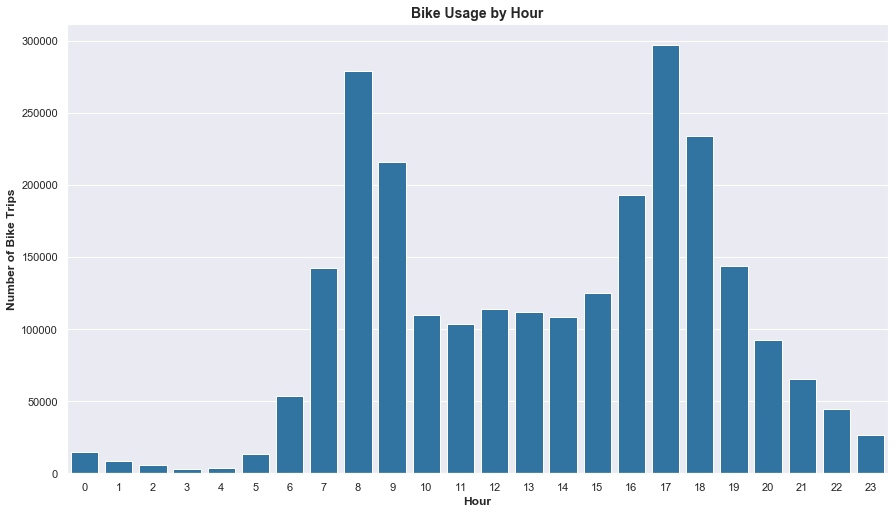

In [6]:
# Hour usage of the Bay Wheels
plt.figure(figsize=[14.70, 8.27])
ax = sns.countplot(data = bike_clean, x = 'start_time_hour', color = base_color)
ax.set_title('Bike Usage by Hour', fontdict = {'fontsize':14,  'fontweight':'bold'})
ax.set_xlabel('Hour', fontsize = 12, weight = "bold")
ax.set_ylabel('Number of Bike Trips', fontsize = 12, weight = "bold")
ax.set_xticklabels(ax.get_xticklabels());

**The hourly bike ride shows that the maximum ride is taken on morning and evening. The morning ride time from 8AM to 9PM, evening 17PM to 19PM.**

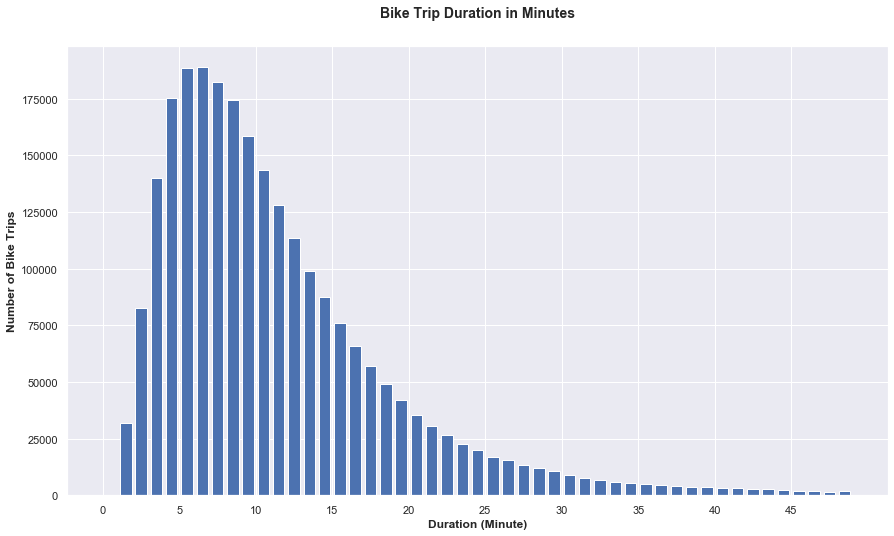

In [7]:
# Duration of the bike rides in MINUTES
bin_edges = np.arange(0, 50, 1)
ticks = np.arange(0, 50, 5).tolist()
labels = ['{}'.format(val) for val in ticks]
plt.figure(figsize=[14.70, 8.27])
plt.hist(data = bike_clean, x = 'duration_min', bins = bin_edges, rwidth = 0.75);
plt.title("Bike Trip Duration in Minutes", y=1.05, fontsize=14, fontweight='bold')
plt.xlabel('Duration (Minute)', fontsize = 12, weight = "bold")
plt.ylabel('Number of Bike Trips', fontsize = 12, weight = "bold")
plt.xticks(ticks, labels);

**The maximum usage of bike ride is 7 minutes. The bin shows that the maximum ride time is 5- 10 minutes. The user communicate the ride with distance of maximum 10 minutes** 

## The relation between the user type and usage by day, week and month are explorated.


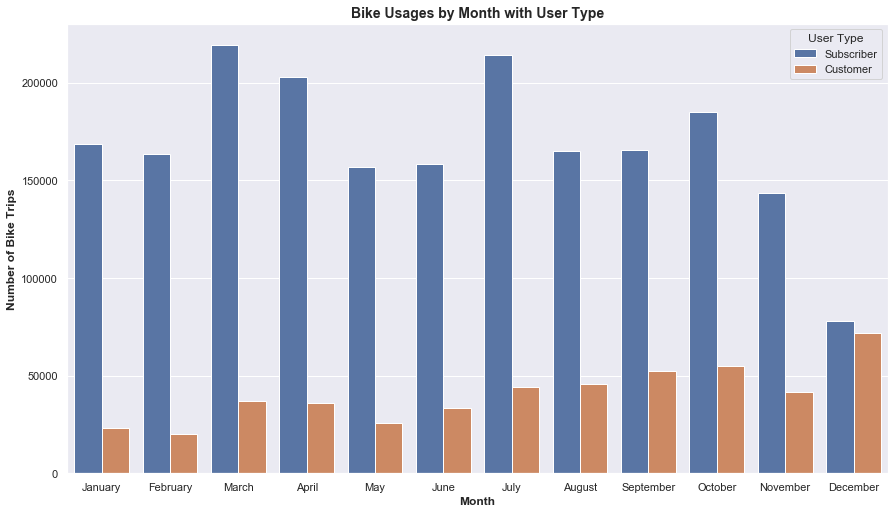

In [8]:
plt.figure(figsize=[14.70, 8.27])
ax = sns.countplot(data = bike_clean, 
                   x = 'start_time_month', 
                   hue='user_type')
ax.set_title('Bike Usages by Month with User Type', fontdict = {'fontsize':14,  'fontweight':'bold'})
ax.set_xlabel('Month', fontsize = 12, weight = "bold")
ax.set_ylabel('Number of Bike Trips', fontsize = 12, weight = "bold")
#ax.set(xlabel='Month', ylabel='Number of Bike Trips', title='Bay Wheels Usage by Month')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(title='User Type');

**The relation between user type and monthly usage shows subscribed user rides more frequently than the customer. The highest usage is during march, july and lowest during december by subscribed user whereas the customer usage is highest during december. **

In [9]:
bike_clean_week_usage = bike_clean.groupby(['start_time_weekday', 'user_type']).size().reset_index()
bike_clean_week_usage.rename(columns={0:'number_of_trips'}, inplace=True)
bike_clean_week_usage

,start_time_weekday,user_type,number_of_trips
0,Friday,Customer,75944
1,Friday,Subscriber,321340
2,Monday,Customer,66529
3,Monday,Subscriber,329934
4,Saturday,Customer,72705
5,Saturday,Subscriber,161665
6,Sunday,Customer,64743
7,Sunday,Subscriber,147561
8,Thursday,Customer,70393
9,Thursday,Subscriber,354081


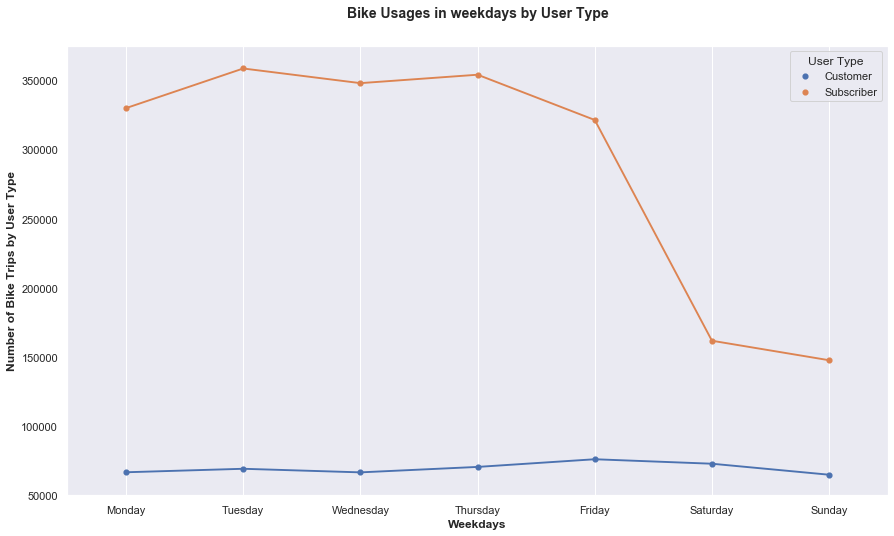

In [10]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=[14.70, 8.27])
ax = sns.pointplot(data = bike_clean_week_usage, x = 'start_time_weekday', y = 'number_of_trips', 
                   hue = 'user_type', scale=.7, order = day_order);
plt.title('Bike Usages in weekdays by User Type', y=1.05, fontsize=14, fontweight='bold')
plt.xlabel('Weekdays', fontsize = 12, weight = "bold")
plt.ylabel('Number of Bike Trips by User Type', fontsize = 12, weight = "bold")
plt.legend(title = 'User Type')
plt.grid();

**The relation between user type and weekly usage shows subscribed user rides more frequently during weekdays and less during weekends. The weekly usage of customer remains consistent throughout the week.**

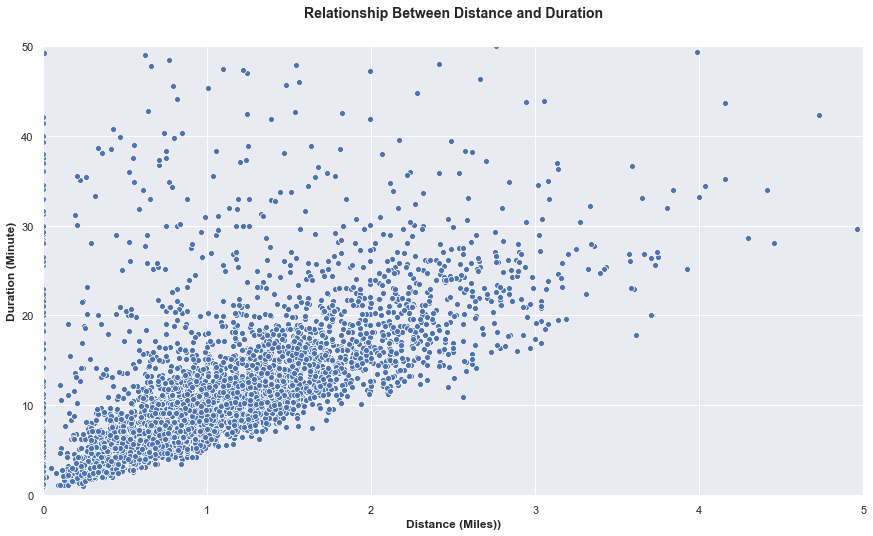

In [11]:
plt.figure(figsize=[14.70, 8.27])
sns.scatterplot(data=bike_clean.sample(5000), x='distance_miles', y='duration_min')
plt.xlim(0, 5)
plt.ylim(0, 50);
plt.title('Relationship Between Distance and Duration', y=1.05, fontsize=14, fontweight='bold')
plt.xlabel('Distance (Miles))', fontsize = 12, weight = "bold")
plt.ylabel('Duration (Minute)', fontsize = 12, weight = "bold");

**The relation between distance and duration shows ride duration is higher with respect to distance. The most frequent ride distance are within three miles and 30 minutes duration.**

**From the bivariate exploration it is found that subscribed users uses more trips when compared to customer. The subscribed users trip are more during weekdays than weekends but customer usage is consistant.**

## The relation between user type and usage of rides during various months.



NameError: name 'calendar' is not defined

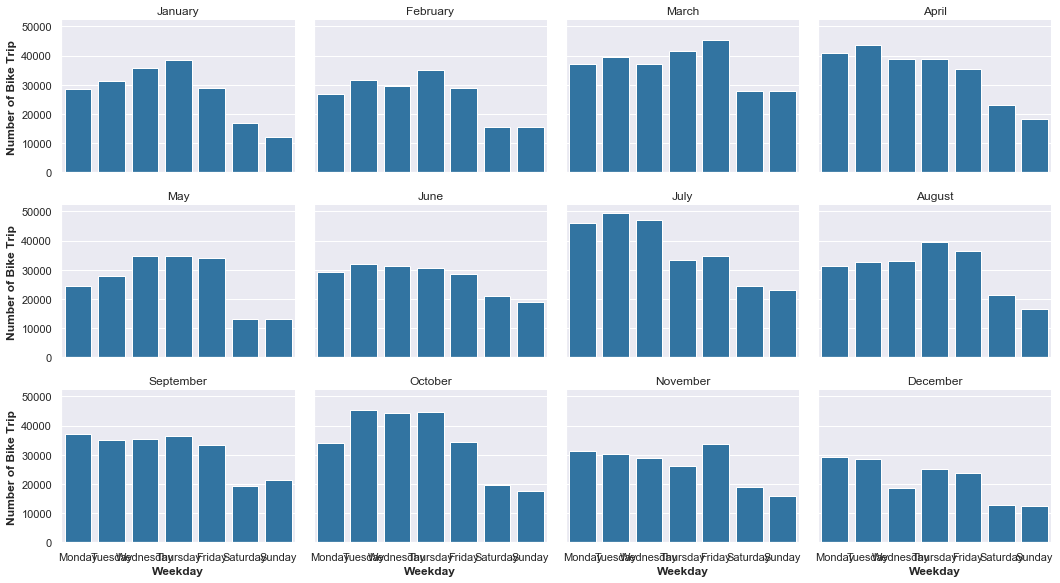

In [12]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
g = sns.FacetGrid(data = bike_clean, col = 'start_time_month', col_wrap = 4, height = 8.27/3,  aspect = (14.70/4)/(8.27/3))
g.map(sns.countplot, 'start_time_weekday',  color = base_color, order = day_order)
g.set_titles('{col_name}')
g.set_xlabels('Weekday', fontsize = 12, weight = "bold");
g.set_ylabels('Number of Bike Trip', fontsize = 12, weight = "bold");
g.set(xticklabels=list(calendar.day_abbr))
g.fig.suptitle('Bike Usage by Day of Week in Each Month', y=1.05, fontsize=14, fontweight='bold')
g.set_xticklabels(rotation=0);

**The relation between user type and monthly usage shows subscribed user rides more frequently than the customer. The highest usage is during march, july and lowest during december by subscribed user whereas the customer usage is highest during december.**

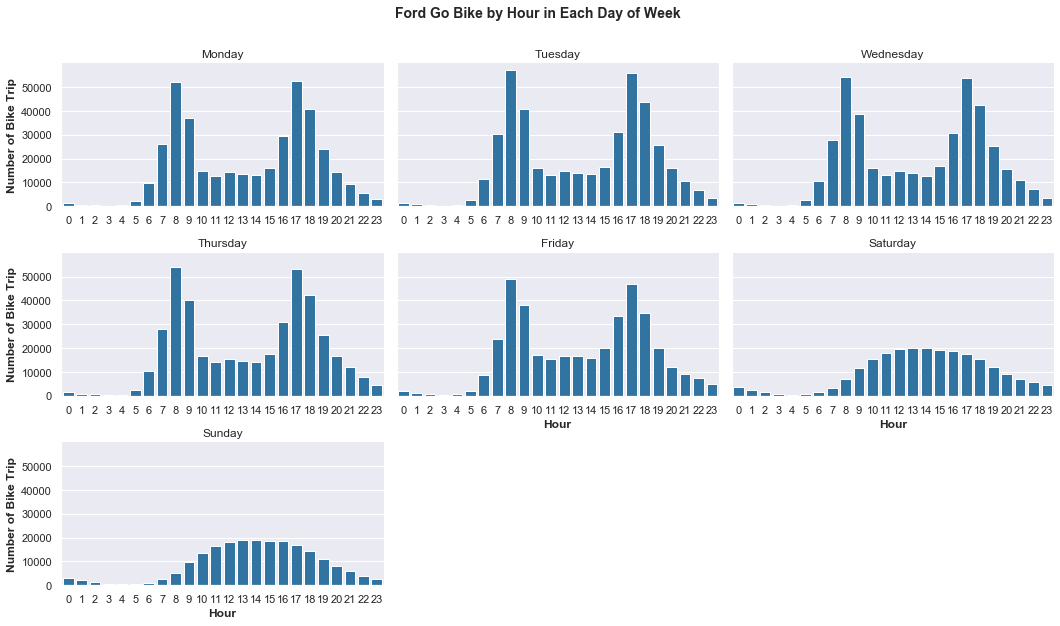

In [13]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dayClasses = pd.api.types.CategoricalDtype(ordered = True, categories = day_order)
bike_clean['start_time_weekday'] = bike_clean['start_time_weekday'].astype(dayClasses)

g = sns.FacetGrid(data = bike_clean, col = 'start_time_weekday', col_wrap = 3, height = 8.27/3,  aspect = (14.70/3)/(8.27/3), sharex = False)
g.map(sns.countplot, 'start_time_hour',  color = base_color)
g.set_titles('{col_name}')
g.set_xlabels('Hour', fontsize = 12, weight = "bold");
g.set_ylabels('Number of Bike Trip', fontsize = 12, weight = "bold");
g.fig.suptitle('Ford Go Bike by Hour in Each Day of Week', y=1.05, fontsize=14, fontweight='bold');

**The hourly bike ride shows that the maximum ride is taken on morning and evening. The morning ride time from 8AM to 9PM, evening 17PM to 19PM.**

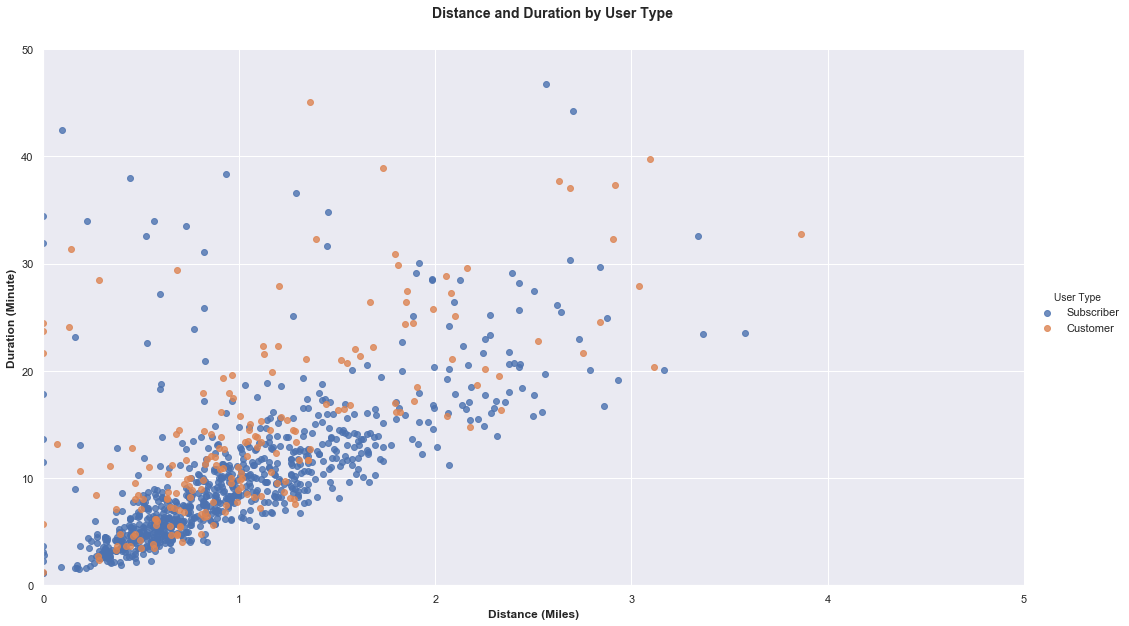

In [14]:
g = sns.FacetGrid(data=bike_clean.sample(1000), hue='user_type', height = 8.27,  aspect = 14.70/8.27)
g.map(sns.regplot, 'distance_miles', 'duration_min', fit_reg=False)
g.add_legend(title = 'User Type')
g.fig.suptitle('Distance and Duration by User Type', fontsize = 14, weight = "bold", y=1.05)
g.set_xlabels('Distance (Miles)', fontsize = 12, weight = "bold");
g.set_ylabels('Duration (Minute)', fontsize = 12, weight = "bold");
plt.xlim(0, 5)
plt.ylim(0, 50);

**The usage by both Subscribed user and customer with distance shows that the subscriber travelled more than the customer**

## CONCLUSION
> Bay area dataset exploration shows that 

- There are two types of users subscribers and customers.
- Subscribers use frequently to commute during weekdays around 8AM-9AM and 5PM-7PM.
- Customers use to explore the city during weekends and they are occational riders.
- Subscribers are the most frequent riders throughout the year.


> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!